## Wayne Chilionje

### Business Goal

You are required to model the price of cars with the available independent variables.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1: Reading and Understanding the Data

In [ ]:
cars = pd.read_csv('../input/CarPrice_Assignment.csv')

FileNotFoundError: ignored

In [ ]:
cars.shape

(205, 26)

In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### 2. Lets work with a subset of data, since we want to ignore most of the variables

In [ ]:
# Selecting specific variables
selected_variables = ['CarName', 'price', 'citympg', 'highwaympg']

# Creating a subset with selected variables
cars1 = cars[selected_variables]
cars1.head(3)

NameError: ignored

In [ ]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
CarName       205 non-null object
price         205 non-null float64
citympg       205 non-null int64
highwaympg    205 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.5+ KB


* We have carried out feature selection although not using advanced tecniques
* Now we want to clean the data.
* After selecting a subset of the main df, we will split the variable **CarName**, in order to differentiate car manufacturer and model

In [ ]:
#Splitting company name from CarName column
CompanyName = cars1['CarName'].apply(lambda x : x.split(' ')[0])
cars1.insert(3,"CompanyName",CompanyName)
cars1.drop(['CarName'],axis=1,inplace=True)
cars1.head()

,price,citympg,CompanyName,highwaympg
0,13495.0,21,alfa-romero,27
1,16500.0,21,alfa-romero,27
2,16500.0,19,alfa-romero,26
3,13950.0,24,audi,30
4,17450.0,18,audi,22


In [ ]:
#Confirming new variable name for car manufacturer
cars1.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [ ]:
#Fixing spelling errors in our manufacturer names
cars1.CompanyName = cars1.CompanyName.str.lower()

def replace_name(a,b):
    cars1.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars1.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#Checking for duplicates
cars1.loc[cars1.duplicated()]

,price,citympg,CompanyName,highwaympg
36,7295.0,30,honda,34
45,8916.5,38,isuzu,43
88,9279.0,23,mitsubishi,30


### 3: Visualizing the data
* Understanding price as a variable

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [ ]:
print(cars1.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Inference :

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#### 4. Building a correlation matrix to see of we've selected appropriate variables

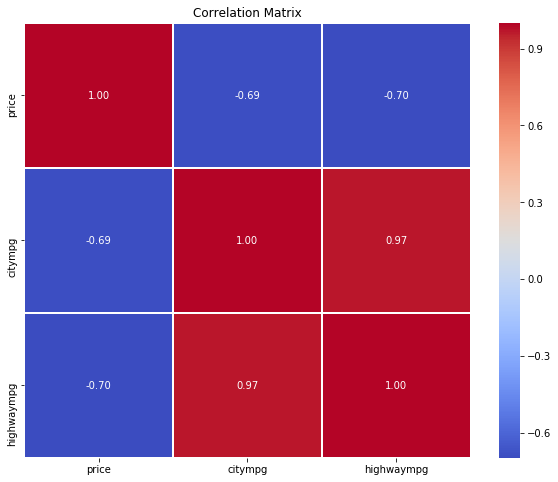

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cars' is your DataFrame
# Calculate the correlation matrix
correlation_matrix = cars1.corr()

# Plotting the correlation matrix as a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### Interpretation:
* Price and City MPG (Miles Per Gallon):

The correlation coefficient between "Price" and "City MPG" is -0.685751.
This indicates a moderate negative correlation between the two variables.
As the price of a car increases, the city miles per gallon tends to decrease, and vice versa.

* Price and Highway MPG (Miles Per Gallon):

The correlation coefficient between "Price" and "Highway MPG" is -0.697599.
Similar to the previous case, this also shows a moderate negative correlation.
As the price of a car increases, the highway miles per gallon tends to decrease, and vice versa.

* City MPG and Highway MPG:

The correlation coefficient between "City MPG" and "Highway MPG" is 0.971337.
This indicates a very strong positive correlation between the two variables.
As city miles per gallon increases, highway miles per gallon also tends to increase, and vice versa.

### 4. Feature Engineering (Making a fuel economy variable)
* This helps us quantify fuel efficiency conclusively

In [ ]:
#Fuel economy> We use a distr of 55% to citympg since drivers mostly spend time
#driving in city roads
cars1['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [ ]:
#Binning the Car Companies based on avg prices of each Company.
cars1['price'] = cars1['price'].astype('int')
temp = cars1.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['cars1range'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars1.head()

,price,citympg,CompanyName,highwaympg,fueleconomy
0,13495,21,alfa-romero,27,23.70
1,16500,21,alfa-romero,27,23.70
2,16500,19,alfa-romero,26,22.15
3,13950,24,audi,30,26.70
4,17450,18,audi,22,19.80


### 5. Bivariate Analysis

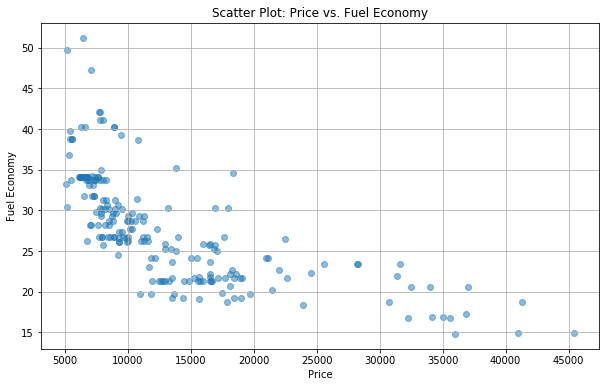

<Figure size 432x288 with 0 Axes>

In [ ]:
#plt.tight_layout()
# Scatter plot between 'Price' and 'FuelEconomy'
plt.figure(figsize=(10, 6))
plt.scatter(cars1['price'], cars1['fueleconomy'], alpha=0.5)
plt.title('Scatter Plot: Price vs. Fuel Economy')
plt.xlabel('Price')
plt.ylabel('Fuel Economy')
plt.grid(True)
plt.show()

#### Inference :

1. `fueleconomy` has an obvios `negative correlation` with price and is significant.

### 6. Train-Test Split and feature scaling

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['price', 'fueleconomy', 'highwaympg', 'citympg']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head(5)

,citympg,CompanyName,highwaympg,fueleconomy
122,0.500000,plymouth,0.567568,0.530864
125,0.166667,porsche,0.270270,0.213992
166,0.361111,toyota,0.324324,0.344307
1,0.222222,alfa-romero,0.270270,0.244170
199,0.111111,volvo,0.135135,0.122085


In [ ]:
df_train.describe()

,price,citympg,highwaympg,fueleconomy
count,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.344211,0.374976,0.358265
std,0.215682,0.186165,0.188477,0.185980
min,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.166667,0.216216,0.198903
50%,0.140343,0.333333,0.378378,0.344307
75%,0.313479,0.500000,0.527027,0.512346
max,1.000000,1.000000,1.000000,1.000000


### Step 8 : Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Step 1: Prepare the data
X = cars1[['fueleconomy']]  # Feature variable (independent variable)
y = cars1['price']           # Target variable (dependent variable)

In [ ]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 3: Create a linear regression model and fit it with training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# Step 4: Check the results of model fitting
# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

In [ ]:
# Calculate RMSE without using squared parameter
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared manually
def r2_score_manual(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

r2_train = r2_score_manual(y_train, y_train_pred)
r2_test = r2_score_manual(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"R-squared (Training): {r2_train}")
print(f"R-squared (Testing): {r2_test}")

Training RMSE: 5163.726228542304
Testing RMSE: 7066.2113496148
R-squared (Training): 0.5625221108775154
R-squared (Testing): 0.27932795736675875


#### Training RMSE (Root Mean Squared Error):

##### Training RMSE: 5163.73
* This value represents the average deviation of the predicted prices from the actual prices in your training dataset.

* In this context, it means that, on average, your model's predictions for the price of a car in the training set are off by approximately 5163.73.
Testing RMSE (Root Mean Squared Error):

##### Testing RMSE: 7066.21
* Similar to the training RMSE, this value represents the average deviation of the predicted prices from the actual prices, but it is calculated on a separate testing dataset that the model has not seen during training.

* In this case, it means that, on average, your model's predictions for the price of a car in the testing set are off by approximately 7066.21.

#### R-squared (Training):

##### R-squared (Training): 0.5625
* R-squared is a measure of how well the independent variable (in this case, 'Fuel Economy') explains the variability in the dependent variable ('Price').

* An R-squared value of 0.5625 indicates that about 56.25% of the variability in the training set response variable (price) is explained by your model.
R-squared (Testing):

##### R-squared (Testing): 0.2793
* Similar to the training R-squared, but calculated on the testing dataset.

* An R-squared value of 0.2793 indicates that about 27.93% of the variability in the testing set response variable (price) is explained by your model.

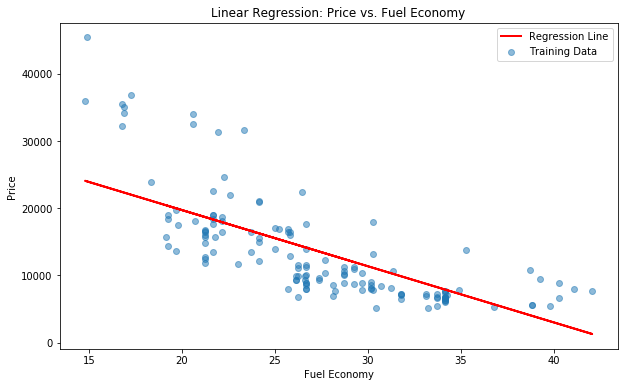

In [ ]:
# Step 5: Visualize the results
plt.figure(figsize=(10, 6))

# Scatter plot for training set
plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')

# Regression line
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Price vs. Fuel Economy')
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Direction of the Relationship:

* As fuel economy increases (moves to the right on the X-axis), the price of the cars tends to decrease (moves down on the Y-axis).

* Conversely, as fuel economy decreases, the price of the cars tends to increase.

* In the context of cars, a negative slope suggests that, on average, cars with better fuel economy might have lower prices, while cars with lower fuel economy might have higher prices.

In [ ]:
# Step 6: Apply the model for predictions
# For example, predict the price for a given fuel economy value
new_fuel_economy = [[23.655]]  # Replace some_value with the fuel economy value to predict
predicted_price = model.predict(new_fuel_economy)
print(f"Predicted Price for Fuel Economy {new_fuel_economy[0][0]}: {predicted_price[0]}")

Predicted Price for Fuel Economy 23.655: 16667.630870144385


In [ ]:
print('coefficient of determination:', model.score(X, y))

coefficient of determination: 0.4847133445800917


* **Accuracy isn't good meaning further model improvement or exploration may be necessary to enhance predictive performance on the testing set.**
* Considerations might include feature engineering, model tuning, or using more advanced regression technique